In [4]:
import tkinter as tk
from tkinter import filedialog as fd
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import os
from lmfit import Model

# import import_ipynb
# %run LESK32.ipynb

In [6]:
print(18e-5 / np.pi)

5.7295779513082324e-05


[(1684.9568439190743, '1pad'),
 (1274.7126655085426, '1padext(1)'),
 (3738.010742223923, 'C1_P01'),
 (59716.433900572396, 'C1_P04'),
 (3310.910072376464, 'smallest structure shorted')]

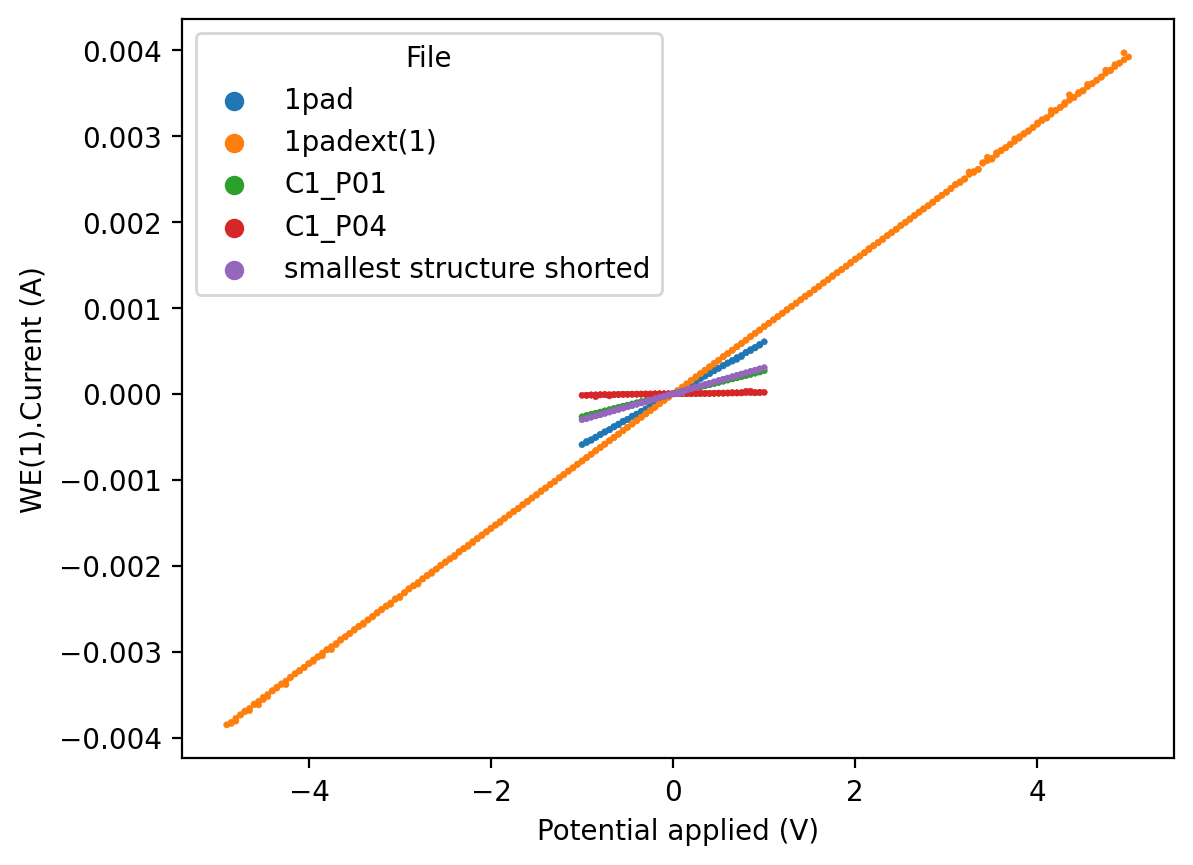

In [33]:
# Tests of SU8 pyrolyzed carbon
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\IDEA2_TLM\Substrate_PSU8'
sample = 'Si/SiO2/pCarbon'
# pcarbon = C_R(path, 100, sample) # , lmo8h_pt_fit, lmo8h_pt_fit_vals, lmo8h_pt_iv_curves
# # print(lmo8h_pt[1].fit_report())

#Model

def line(x, m, b):
    return x * m + b

line_mod = Model(line)
line_params = line_mod.make_params(m = 1, b = 1)
fig, ax = plt.subplots(dpi = 200)



files = [os.path.join(path, i) for i in os.listdir(path)]
iv = pd.DataFrame()
resist = []
for i in files:
    df = pd.read_csv(i, sep = ';')
    df['File'] = os.path.basename(i)[:-4]
    line_fit = line_mod.fit(df['WE(1).Current (A)'], line_params, x = df['Potential applied (V)'])
    slope = line_fit.values['m']
    resistance = 1 / slope
    resist.append((resistance, os.path.basename(i)[:-4]))
    iv = pd.concat([iv, df], ignore_index = True)

sns.scatterplot(data = iv, x = 'Potential applied (V)', y = 'WE(1).Current (A)', hue = 'File', edgecolor = None, s =5)

resist


In [49]:
def queue_time(customers, n):
    l=[0]*n

    for i in customers:
        
        # print(l[l.index(min(l))])
        
        l[l.index(min(l))]+=i
    # print(l)
    return max(l)

c = [5,5]
c[c.index(min(c))] += 4
print(c)

a = [5,2,3,4]

# print(c.index(min(c)))



b = queue_time(a, 2)
print(b)

[9, 5]
9


In [7]:
# exponential
x = np.linspace(0, -10)
y = np.exp(x)
# plt.plot(x, y)
R = 8.31446261815324
T = 300
F = 96_485.3321
R * T * np.log(0.01) / F



-0.11905285869342554

In [15]:
original = 3.125 *3
vol = 50
conc_0 = original/vol
0.375 / 0.6

0.625

In [90]:
x = 0.0592
F = 96_485.3321
# x/2 * np.log10(0.8**2)
# x * np.log10(1/5e-5)
# 2*0.016/x
# (np.log10(5e-5) + 0.5405) / 2
# g_1 = -10*F*1.51
# g_2 = -10*F*1.36
# g_1 / g_2
# (x/2)*np.log10(0.08)
# w = 0.76+0.03245
# w + 0.800675
# a = 0.0128265
# np.log10(1/a) * (x/2) - 0.356
1.46 - 0.13 + 0.356

1.686

In [14]:
F = 96485 # C/mol
lmo_density = 4.1 # g/cm3
lmo_mw = 180.81 #g/mol
lmo_qth = 148 * 4.1 # mAh/cm3
coef = lmo_qth * 3.6
charge = coef * (np.pi* 0.5**2) * 30000 * 1e-7
current = charge / 3600 # 1C rate current

calc_qth = F/(3600*180.81)


area = np.pi * 0.5**2
# print(9 * 5 / 0.78539)
# print(57.29637504933854 * 100 / 92)

# print(1662.8 - 1594.6)
print(area * 68.2 / 9 * 0.92)

5.475446929356611


In [3]:

area = np.pi * 0.5**2
# thickness = 90e-7
thickness_to_input = 0.6176 / (2268 * area) # cm # 1.4400000000000002
thick_in_nm = thickness_to_input * 1e7
thick_in_nm
# print('charge', 400e-6 * 3600)
thickness_to_input

0.00034671637690848175

C:\Users\lopezb41\AppData\Local\Temp\ipykernel_13536\2234492387.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Cycles'], np.random.rand(len(df)), c=colors, cmap=cmap, label='Data Points')


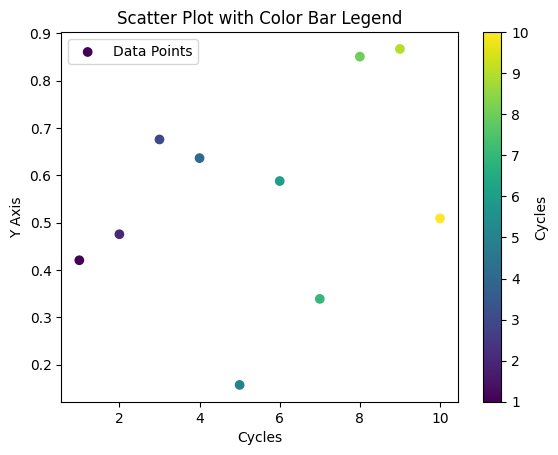

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import pandas as pd

# Sample DataFrame with 'Cycles' column ranging from 1 to 10
data = {'Cycles': np.arange(1, 11)}
df = pd.DataFrame(data)

# Define the colormap and normalize based on the 'Cycles' values
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=df['Cycles'].min(), vmax=df['Cycles'].max())
colors = cmap(norm(df['Cycles']))

# Create a scatter plot with color-mapped points
plt.scatter(df['Cycles'], np.random.rand(len(df)), c=colors, cmap=cmap, label='Data Points')

# Create a color bar legend
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is required for the ScalarMappable
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Cycles')

# Customize the plot and add labels
plt.xlabel('Cycles')
plt.ylabel('Y Axis')  # You can modify this label based on your data
plt.title('Scatter Plot with Color Bar Legend')
plt.legend()

# Show the plot
plt.show()




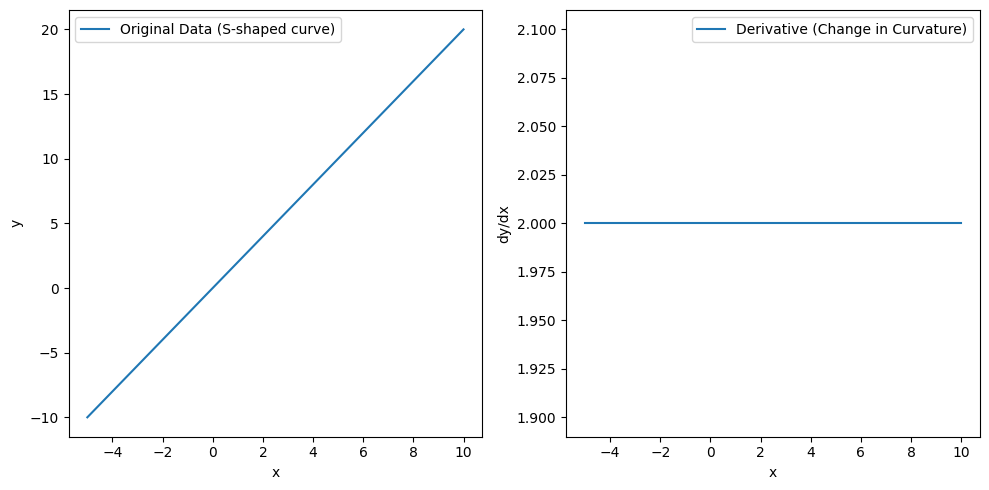

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data in x and y
# Replace this with your actual data
x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = x*2   # S-shaped curve

# Calculate the derivative using numpy's gradient function
dy_dx = np.gradient(y, x)

# Plot the original data and the derivative
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Original Data (S-shaped curve)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy_dx , label='Derivative (Change in Curvature)')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()

plt.tight_layout()
plt.show()


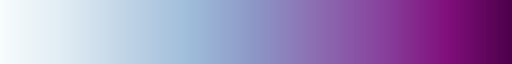

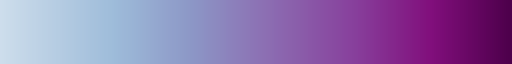

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Get the 'BuPu' colormap
BuPu = plt.cm.get_cmap('BuPu', 256)
display(BuPu)
# # Create a new colormap without the first 25 entries (which are close to white)
newcolors = BuPu(np.linspace(0, 1, 256))
newcmp = mcolors.LinearSegmentedColormap.from_list("BuPu_no_white", newcolors[50:,:])
newcmp
# # Display the new colormap
# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))

# fig, ax = plt.subplots()
# ax.imshow(gradient, aspect='auto', cmap=newcmp)
# plt.show()


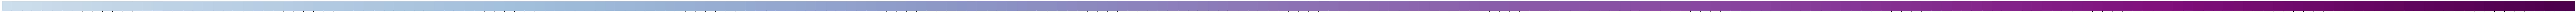

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Get the BuPu colormap
BuPu = plt.cm.get_cmap('BuPu', 256)

# Create a new colormap without the first 50 colors (which are close to white)
new_BuPu = ListedColormap(BuPu(np.linspace(0.2, 1, 256)))

# Now you can use new_BuPu as your colormap in seaborn
sns.palplot(sns.color_palette(new_BuPu.colors))

In [8]:
a = 4e-5 / 3.1416
print(a)

1.2732365673542146e-05


In [9]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\L22\L22_TiO2_90\1C\lith'
files = [os.path.join(path, i) for i in os.listdir(path)]
new_files = []
for i in files:
    directory, filename = os.path.split(i)
    numeric_part = filename.split('_')[-1].split('.txt')[0]
    numeric_two_decimals = '{:02d}'.format(int(numeric_part))
    
    new_filename =filename[:-7] + filename[-7:-4].replace(numeric_part, numeric_two_decimals) + '.txt'  # filename.replace(numeric_part, numeric_two_decimals)
    new_file_path = os.path.join(directory, new_filename)
    
    if i != new_file_path:
                
        os.rename(i, new_file_path)
        print(f"Renamed: {i} => {new_file_path}")

    

In [10]:
#warburg
zw = 400.75
tau = 18.303
alpha = 0.69

print(34 * 9e-5)
print((16+7) * 0.035)

0.0030600000000000002
0.805


In [11]:
# Change txt file
file = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\IDEA3_TLM\Pt on top\AUT\S10_up.txt'
df = pd.read_csv(file, sep = ';', usecols=[0,1,2])
new_df = pd.concat([df['Potential applied (V)'], df['WE(1).Current (A)'], df['Time (s)']], axis = 1)

new_df.to_csv(r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\IDEA3_TLM\Pt on top\AUT\S10_up_new.txt', ';', index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Contact Resistance\\IDEA3_TLM\\Pt on top\\AUT\\S10_up.txt'

In [ ]:
diameter = 1.5 # cm
radius = diameter / 2
area = np.pi * radius**2
print(0.05/area)
area

0.02829421210522584


1.7671458676442586

In [ ]:
r = 1.5/2
area = np.pi * r**2
area

1.7671458676442586

In [ ]:
a = 200 / 0.785
b = 10 / 3.1416
print(a,b)

254.77707006369425 3.183091418385536


In [ ]:
areal_density = 90e15 # at/cm2 of Li
thickness_th = 68e-7 # cm ; 68 nm
li_density = areal_density * thickness_th
avo = 6.022e23 # 1/mol
li_mol = li_density / avo
print(li_mol * 1000)
print(100 * 100)

1.0162736632348058e-09
10000
